In [1]:
import numpy as np
import matplotlib.pyplot as plt
import brainpy.math as bm
from Network_Multiple_Maps import Place_net, Grid_net

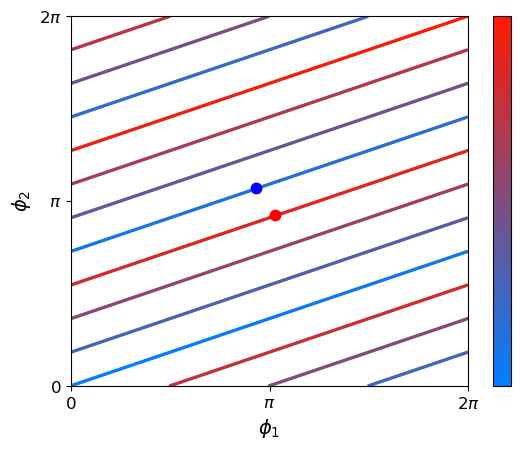

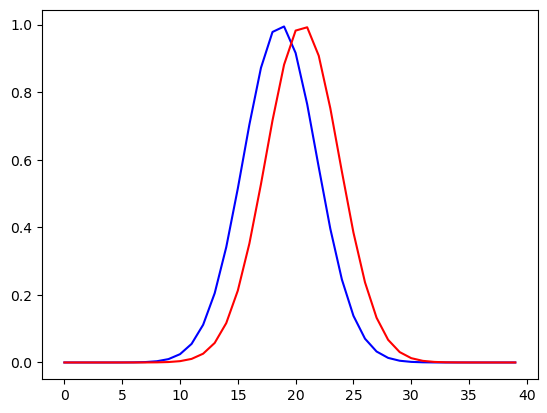

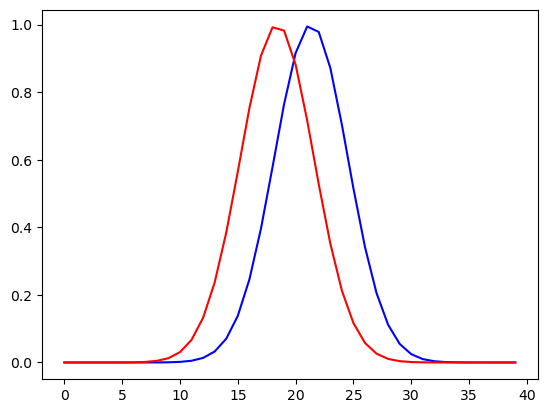

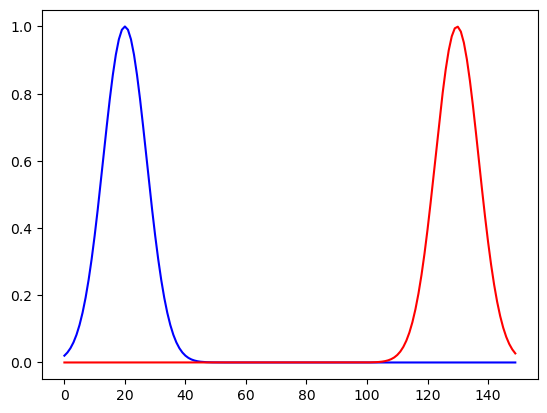

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# 参数设置
lambda_1 = 4
lambda_2 = 11

# 数据生成
z = np.linspace(0, lambda_1 * lambda_2, 3000, endpoint=False)
phi_1 = z % lambda_1 * 2 * np.pi / lambda_1
phi_2 = z % lambda_2 * 2 * np.pi / lambda_2

# 自定义colormap
# colors = [(0, 0.5, 1), (1, 0.9, 0.), (1, 0.1, 0)]  # 这里是蓝色、绿色、红色
colors = [(0, 0.5, 1), (1, 0.1, 0)]  # 这里是蓝色、绿色、红色
n_bins = 100  # 使用的bins数量
cmap_name = 'my_custom_cmap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 绘制散点图
plt.figure()
sc = plt.scatter(phi_1, phi_2, c=z, cmap=cm, s=2, vmin=0, vmax=lambda_1 * lambda_2)
point_1 = 400
point_2 = 2595
plt.plot(phi_1[point_1], phi_2[point_1]+0.01, 'b.', markersize=15)
plt.plot(phi_1[point_2], phi_2[point_2]+0.01, 'r.', markersize=15)

# 设置标签和字体大小
plt.xlabel(r'$\phi_1$', fontsize=14)
plt.ylabel(r'$\phi_2$', fontsize=14)

# 设置坐标范围
plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)

# 设置x和y轴刻度
plt.xticks([0, np.pi, 2 * np.pi], [r'$0$', r'$\pi$', r'$2\pi$'])
plt.yticks([0, np.pi, 2 * np.pi], [r'$0$', r'$\pi$', r'$2\pi$'])

# 添加colorbar并设置颜色范围
cbar = plt.colorbar(sc)
cbar.ax.tick_params(size=0)  # 隐藏colorbar的ticks
cbar.ax.set_yticklabels([])  # 删除colorbar的tick标签

# 调整整体字体大小
plt.tick_params(axis='both', which='major', labelsize=12)

# 保存图形为矢量图
plt.savefig('scatter_plot.svg', format='svg')

# 显示图形
plt.show()

def bump_phase(phi, a=0.5):
    n_neuron = 40
    theta = np.linspace(-np.pi, np.pi, n_neuron, endpoint=False)
    dis = np.abs(theta - phi)
    dis = np.where(dis < np.pi, dis, np.pi * 2 - dis)
    bump = np.exp(-(theta - phi)**2 / (2 * a**2)) + np.random.randn(n_neuron) * 0.
    return bump

plt.figure()
bump_1 = bump_phase(phi_1[point_1] - np.pi)
bump_2 = bump_phase(phi_1[point_2] - np.pi)
plt.plot(bump_1, 'b')
plt.plot(bump_2, 'r')

# 保存图形为矢量图
plt.savefig('bump_phase_1.svg', format='svg')

plt.figure()
bump_1 = bump_phase(phi_2[point_1] - np.pi)
bump_2 = bump_phase(phi_2[point_2] - np.pi)
plt.plot(bump_1, 'b')
plt.plot(bump_2, 'r')

# 保存图形为矢量图
plt.savefig('bump_phase_2.svg', format='svg')

def bump_pos(z, a=0.3 / np.pi / 2 * lambda_1 * lambda_2):
    x = np.linspace(0, lambda_1 * lambda_2, 150, endpoint=False)
    bump = np.exp(-(x - z)**2 / (2 * a**2))
    return bump

plt.figure()
bump_1 = bump_pos(z[point_1])
bump_2 = bump_pos(z[point_2])
plt.plot(bump_1, 'b')
plt.plot(bump_2, 'r')

# 保存图形为矢量图
plt.savefig('bump_pos.svg', format='svg')

# 显示图形
plt.show()


In [2]:
z_min = 0
z_max = 20
place_num = 800
grid_num = 20
module_num = 7
map_num = 3
a_p = 0.5
Spacing = np.linspace(6,20,module_num)

Place_cell = Place_net(z_min=z_min, z_max=z_max, map_num=map_num, neuron_num=place_num, place_num=place_num, noise_stre=0.5)
maps = bm.as_numpy(Place_cell.map) 
place_index = bm.as_numpy(Place_cell.place_index) 


Gird_module_list = bm.NodeList([])
for module in range(module_num):
    Grid_cell = Grid_net(L = Spacing[module], maps=maps, place_index=place_index, neuron_num=grid_num, J0=5, a_g=a_p/Spacing[module]*2*bm.pi)
    Gird_module_list.append(Grid_cell)

conn_out = Grid_cell.conn_out

/var/folders/cc/s0ls8jsx21n4zc1_dv62hvyc0000gn/T/ipykernel_25091/4065626475.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[i].pcolormesh(grid_indices, sorted_maps, sorted_conn_mat, cmap='viridis')


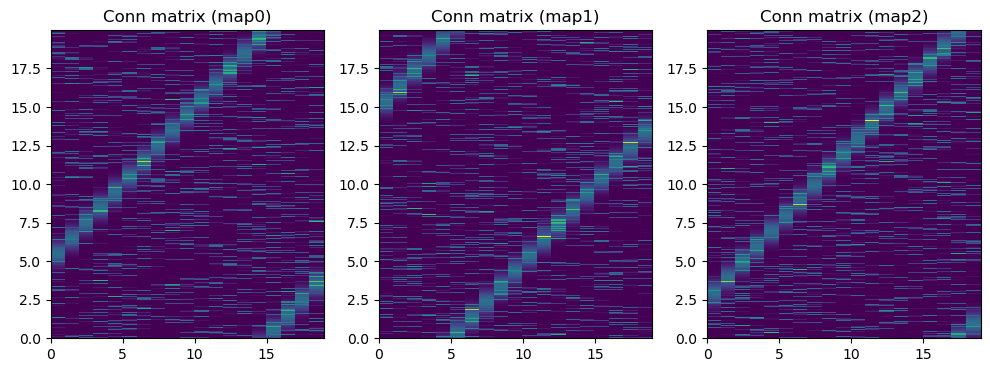

In [3]:
if map_num>1:
    _, ax = plt.subplots(1,map_num,figsize=(map_num*4, 4))
    for i in range(map_num):
        grid_indices = np.arange(grid_num)
        # 获取排序后的索引
        sorted_indices = np.argsort(maps[i])
        sorted_maps = maps[i, sorted_indices]
        sorted_place_index = place_index[i, sorted_indices]
        sorted_conn_mat = conn_out[sorted_place_index,:]
        # 使用 pcolormesh 可视化矩阵
        ax[i].pcolormesh(grid_indices, sorted_maps, sorted_conn_mat, cmap='viridis')
        # ax[i].colorbar()  # 添加颜色条
        ax[i].set_title('Conn matrix (map'+str(i)+')')
else:
    grid_indices = np.arange(grid_num)
    # 获取排序后的索引
    sorted_indices = np.argsort(maps)
    sorted_maps = maps[sorted_indices]
    sorted_place_index = place_index[sorted_indices]
    sorted_conn_mat = conn_out[sorted_place_index,:]
    # 使用 pcolormesh 可视化矩阵
    plt.pcolormesh(grid_indices, sorted_maps, sorted_conn_mat, cmap='viridis')
    # ax[i].colorbar()  # 添加颜色条
    plt.title('Conn matrix')


In [4]:
map_index = 0
def run_net(indices, loc, input_stre):
    r_hpc = Place_cell.r
    output = bm.zeros(place_num,)
    for Grid_cell in Gird_module_list:
        Grid_cell.step_run(indices, r_hpc= r_hpc, loc=loc, input_stre=input_stre,map_index = map_index, )
        output += Grid_cell.output
    Place_cell.step_run(indices, loc=loc, map_index = map_index, input_stre=input_stre, input_g = output)
    place_r = Place_cell.r
        # output = bm.where(output>0, output, 0)
    return output, place_r

total_time = 5000
start_time = 1000
indices = bm.arange(total_time)
loc = bm.zeros(total_time) + (z_max+z_min)/2
input_stre = bm.zeros(total_time) 
input_stre[:start_time] = 10.
output, place_r = bm.for_loop(run_net, (indices, loc, input_stre), progress_bar = True)


  0%|          | 0/5000 [00:00<?, ?it/s]

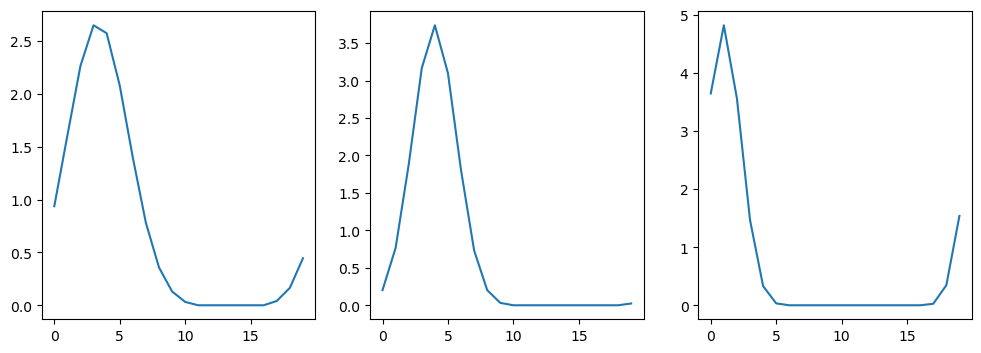

In [5]:
_, ax = plt.subplots(1,3,figsize=(3*4, 4))
for i in range(3):
    Grid_cell = Gird_module_list[i]
    ax[i].plot(Grid_cell.u)

-0.018817732


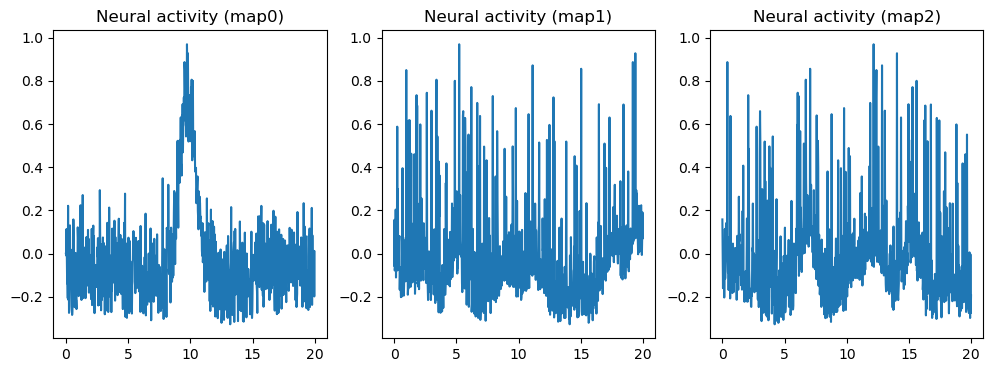

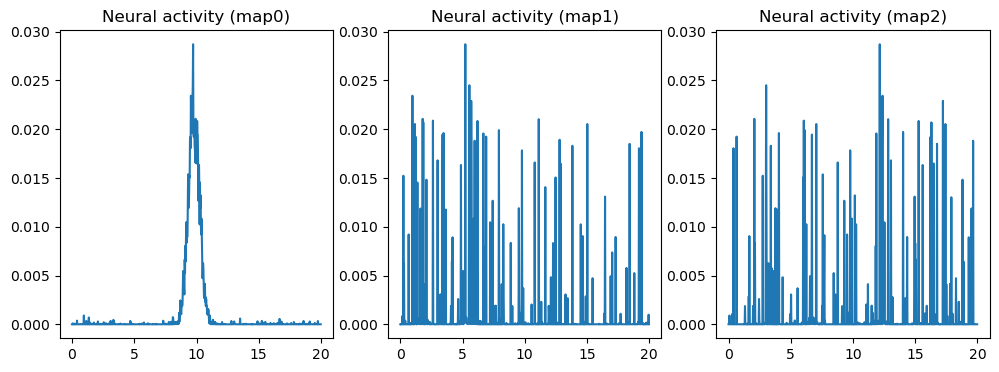

In [6]:
_, ax = plt.subplots(1,map_num,figsize=(map_num*4, 4))
for map_index in range(map_num):
    u_place = bm.as_numpy(output[:, place_index[map_index]])
    sorted_indices = np.argsort(maps[map_index])
    sorted_maps = maps[map_index, sorted_indices]
    sorted_u_place = u_place[:, sorted_indices]
    ax[map_index].plot(sorted_maps, sorted_u_place[-1,:])
    # ax[map_index].set_ylim([0, 5])
    ax[map_index].set_title('Neural activity (map'+str(map_index)+')')

_, ax = plt.subplots(1,map_num,figsize=(map_num*4, 4))
for map_index in range(map_num):
    u_place = bm.as_numpy(place_r[:, place_index[map_index]])
    sorted_indices = np.argsort(maps[map_index])
    sorted_maps = maps[map_index, sorted_indices]
    sorted_u_place = u_place[:, sorted_indices]
    ax[map_index].plot(sorted_maps, sorted_u_place[-1,:])
    ax[map_index].set_title('Neural activity (map'+str(map_index)+')')
print(bm.mean(output[-1,:]))

0.7292807
0.1579322
0.12536667
[0.72928065 0.15793222 0.12536669]


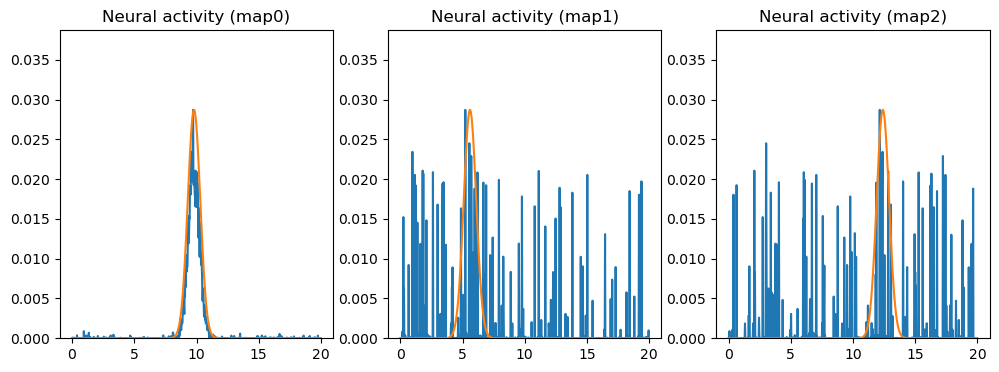

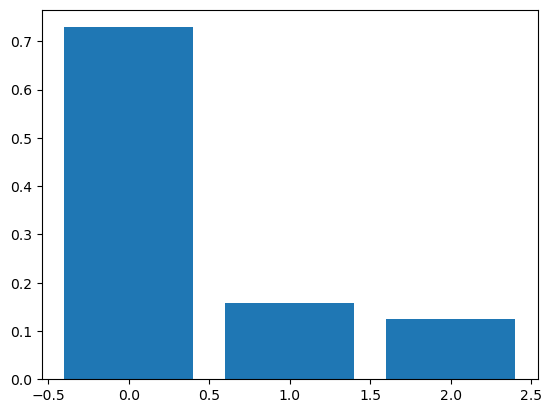

In [7]:
u = Place_cell.r
loc_num = 100
loc_candidate = np.linspace(z_min,z_max,loc_num,endpoint=False)
bump_score = np.zeros(map_num,)
max_score_pos = np.zeros(map_num,)
for map_index in range(map_num):
    u_place = bm.as_numpy(u[place_index[map_index]])
    score_candidate = np.zeros(loc_num,)
    for j in range(loc_num):
        bump = Place_cell.get_bump(map_index, loc_candidate[j])
        u_place = u_place/bm.sum(u_place)
        score_candidate[j] = bm.sum(bump*u_place)
    bump_score[map_index] = np.max(score_candidate)
    max_score_pos[map_index] = loc_candidate[np.argmax(score_candidate)]

_, ax = plt.subplots(1, map_num, figsize=(map_num * 4, 4))
for map_index in range(map_num):
    u_place = bm.as_numpy(u[place_index[map_index]])
    sorted_indices = np.argsort(maps[map_index])
    sorted_maps = maps[map_index, sorted_indices]
    sorted_u_place = u_place[sorted_indices]
    bump = Place_cell.get_bump(map_index, max_score_pos[map_index])
    sorted_bump_normalize = bump[sorted_indices]
    bump_height = bm.max(sorted_u_place[:])
    sorted_bump = sorted_bump_normalize*bump_height

    print(bm.sum(sorted_u_place/bm.sum(sorted_u_place)*sorted_bump_normalize))
    ax[map_index].plot(sorted_maps, sorted_u_place)
    ax[map_index].plot(sorted_maps, sorted_bump)
    ax[map_index].set_title('Neural activity (map' + str(map_index) + ')')
    ax[map_index].set_ylim(0, np.max(u[:])+0.01)
print(bump_score)
plt.savefig('./figures/bump_activity.png')

plt.figure()
plt.bar(np.arange(map_num), bump_score)
plt.savefig('./figures/bump_score.png')